In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [4]:
xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest=xtest.reshape(xtest.shape[0],28,28,1)

In [5]:
xtrain=xtrain/255
xtest=xtest/255

In [6]:
model=keras.Sequential([
    keras.layers.Conv2D(20,kernel_size=(3,3),input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 20)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [7]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=2)

Epoch 1/2
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2135 - accuracy: 0.9366 - val_loss: 0.0735 - val_accuracy: 0.9756
Epoch 2/2
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0868 - accuracy: 0.9734 - val_loss: 0.0547 - val_accuracy: 0.9812


In [8]:
(x_loss,x_acc)=model.evaluate(xtest,ytest)
print("Loss %.3f"%x_loss)
print("Accuracy %.3f"%x_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0547 - accuracy: 0.9812
Loss 0.055
Accuracy 0.981


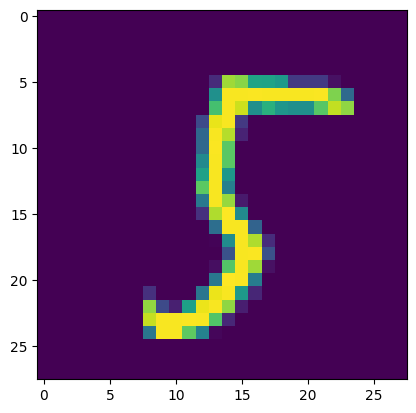

In [10]:
import random
n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()

In [11]:
predicted=model.predict(xtest)
print("Target ",ytest[n])
print("Predicted ",np.argmax(predicted[n]))

313/313 [==============================] - 1s 4ms/step
Target  5
Predicted  5
